In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
data = xr.open_dataset('/glade/work/zilumeng/3D_trans/data/GODAS_up150m_temp_nino_tauxy_1980_2021_kb.nc')
data

<xarray.Dataset>
Dimensions:         (n_mon: 504, lev: 8, lat: 51, lon: 179)
Coordinates:
  * lon             (lon) float64 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat             (lat) float64 -20.0 -19.0 -18.0 -17.0 ... 18.0 19.0 20.0
  * lev             (lev) float64 0.0 5.0 20.0 40.0 60.0 90.0 120.0 150.0
Dimensions without coordinates: n_mon
Data variables:
    temperatureNor  (n_mon, lev, lat, lon) float64 ...
    nino34          (n_mon) float64 ...
    nino3           (n_mon) float64 ...
    nino4           (n_mon) float64 ...
    tauxNor         (n_mon, lat, lon) float64 ...
    tauyNor         (n_mon, lat, lon) float64 ...
    stdtemp         (lev, lat, lon) float64 ...
    stdtaux         (lat, lon) float64 ...
    stdtauy         (lat, lon) float64 ...

In [3]:
# lev_range = 
class para:
    def __init__(self):
        pass
mypara = para()
mypara.lev_range = (1, 8)
mypara.lon_range = (45, 165)
mypara.lat_range = (0, 51)
stdtemp = data["stdtemp"][mypara.lev_range[0] : mypara.lev_range[1]].values
stdtemp = np.nanmean(stdtemp, axis=(1, 2))
stdtaux = data["stdtaux"].values
stdtaux = np.nanmean(stdtaux, axis=(0, 1))
stdtauy = data["stdtauy"].values
stdtauy = np.nanmean(stdtauy, axis=(0, 1))
stds = np.concatenate((stdtaux[None], stdtauy[None], stdtemp), axis=0)
stds

array([0.0171447 , 0.01321697, 0.57352402, 0.64457451, 0.86536217,
       1.10992857, 1.29108846, 1.21018521, 1.01743273])

In [4]:
data_times = pd.date_range("1980-01-01", "2021-12-31", freq="MS")
sst = data['temperatureNor'].loc[dict(lev=5)]
sst = sst.rename({'n_mon': 'time'})
sst['time'] = data_times
sst

<xarray.DataArray 'temperatureNor' (time: 504, lat: 51, lon: 179)>
[4601016 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 2.0 4.0 6.0 8.0 10.0 ... 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
    lev      float64 5.0
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01

In [5]:
obs_loc = np.load("./proxy_map.npz")
# obs_loc
lons = obs_loc["lons"]
lats = obs_loc["lats"]
lons[0],lats[0]

(111.605, 16.448)

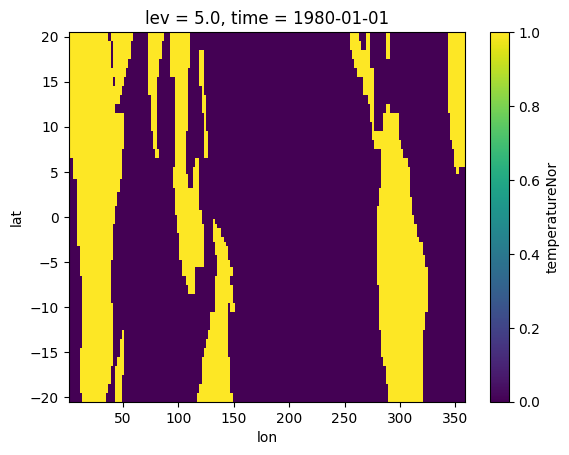

In [6]:
np.isnan(sst)[0].plot()

In [39]:
import pandas as pd


nobs = len(lons)
data_ls = []
for i in range(nobs):
    # print(lons[i], lats[i])
    data_sel = sst.sel(lon=lons[i], lat=lats[i], method='nearest')
    if True in np.isnan(data_sel):
        pass
        # data_ls.append(data_sel)
    else:
    # data_ls.append(data_sel)
    # data_dict = {}
    # data_dict['lon'] = data_sel['lon'].values
    # data_dict['lat'] = data_sel['lat'].values
    # data_dict['sst'] = data_sel
    # data_dict
        data_ls.append(data_sel)
# data_ls = xr.DataArray(data_ls)
# data_ls = pd.DataFrame(data_ls)
# data_ls, len(data_ls)

In [40]:
from collections import Counter
lons_lats = [(float(data.lon.values), float(data.lat.values)) for data in data_ls]
# lons_lats
counter = Counter(lons_lats)
unique_lons_lats = list(counter.keys())
nunique = len(unique_lons_lats)
lons_c = [list(counter.keys())[i][0] for i in range(nunique)]
lats_c = [list(counter.keys())[i][1] for i in range(nunique)]
counter.keys(),counter.values(),len(counter.keys()),len(counter.values())

(dict_keys([(112.0, 16.0), (110.0, 12.0), (100.0, -3.0), (134.0, 8.0), (246.0, 18.0), (100.0, -2.5), (98.0, 0.0), (280.0, 20.0), (152.0, -11.0), (120.0, -17.0), (202.0, 2.0), (298.0, 16.0), (326.0, -4.0), (148.0, -18.0), (270.0, -0.5), (124.0, 1.5), (198.0, 6.0), (300.0, 14.0), (134.0, 7.0), (190.0, -14.0), (268.0, 1.5), (180.0, -17.0), (186.0, -20.0), (96.0, -12.0), (292.0, 18.0), (268.0, -0.5), (294.0, 12.0), (166.0, -0.5), (144.0, 7.0), (200.0, 4.0), (148.0, -19.0), (116.0, -9.0), (118.0, -18.0), (294.0, 18.0), (250.0, 10.0), (144.0, 14.0), (124.0, -10.0), (122.0, 19.0), (174.0, 1.5), (172.0, 3.0), (174.0, 1.0), (116.0, -8.0), (164.0, 5.0), (296.0, 19.0), (106.0, -7.0), (166.0, -16.0), (168.0, -15.0), (92.0, 12.0), (168.0, -16.0), (152.0, -4.0), (210.0, -17.0)]),
 dict_values([4, 10, 16, 2, 2, 2, 2, 10, 8, 8, 10, 8, 4, 4, 2, 2, 34, 2, 6, 2, 4, 16, 8, 12, 10, 8, 2, 4, 6, 10, 2, 4, 8, 20, 8, 2, 6, 4, 2, 6, 2, 6, 6, 6, 2, 4, 2, 2, 4, 4, 2]),
 51,
 51)

In [45]:
data_ls1 = []
for lons_lats in unique_lons_lats:
    data_sel = sst.sel(lon=lons_lats[0], lat=lons_lats[1], method='nearest')
    if True in np.isnan(data_sel):
        pass
        # data_ls.append(data_sel)
        print(lons_lats)
    else:
        data_ls1.append(data_sel)
len(data_ls1)
lonc1 = [data.lon.values for data in data_ls1]
latc1 = [data.lat.values for data in data_ls1]

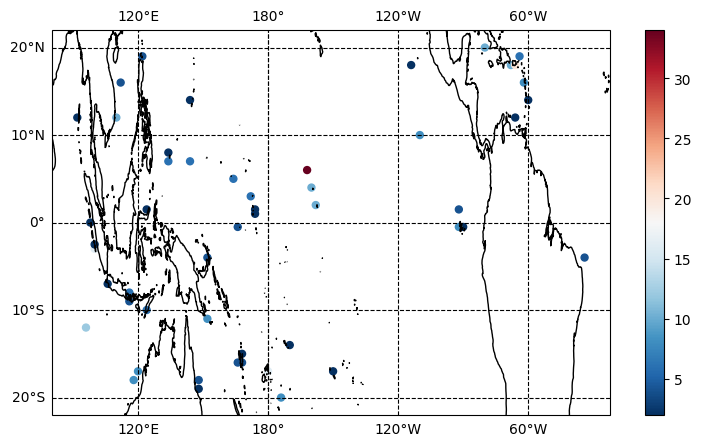

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sacpy.Map
plt.figure(figsize=(9,5))
ax1 = plt.subplot2grid((1,1),(0,0),projection=ccrs.PlateCarree(central_longitude=180))
m = ax1.scatter(lonc1,latc1,25,c=list(counter.values()),marker='o',alpha=1,transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(color='k',linestyle='--',draw_labels=True)
ax1.set_aspect("auto")
# plt.
# ax1.set_title(f'Locations of all proxy records in the CoralHydro2K database (n = {n_selected} )',fontsize=14,loc='center')
# plt.savefig('proxy_map.png',dpi=300,bbox_inches='tight')
# m = plt.scatter(lons_c, lats_c, c=list(counter.values()))
plt.colorbar(m)

In [47]:
import pickle

with open("./sst_obs.pkl", "wb") as f:
    pickle.dump(data_ls1, f)


In [49]:
with open("./sst_obs.pkl", "rb") as f:
    data_ls = pickle.load(f)
# data_ls
len(data_ls)

51